<a href="https://colab.research.google.com/github/Indirapriyadarshini/Authorship-Attribution/blob/master/Frequency_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Workshop 3: Frequency Analysis

**A picture is worth a thousand words**. We are all familiar with this expression. It especially applies when trying to explain the insight obtained from the analysis of increasingly large datasets. Data visualization plays an essential role in the representation of both small and large-scale data.

One of the key skills of a data scientist is the ability to tell a compelling story, visualizing data and findings in an approachable and stimulating way. Learning how to leverage a software tool to visualize data will also enable you to extract information, better understand the data, and make more effective decisions.

The main goal of data visualization with Python is to teach you how to take data that at first glance has little meaning and present that data in a form that makes sense to people. 😁

This workshop covers:

* Frequency Distribution Table
* N-gram
* Bar Chart
* Words Cloud
* Aggregation by Datetime
* Keywords Search
* Line Plot
* Interactive Plot


In [109]:
# update plotly package, will takes a few seconds
!pip install --upgrade plotly

     |████████████████████████████████| 13.1MB 312kB/s 
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [1]:
import os
from os import path
import urllib

import numpy as np
import pandas as pd
import random
random.seed(42)

import nltk
from nltk import everygrams

import matplotlib.pyplot as plt
%matplotlib inline

from PIL import Image
from wordcloud import WordCloud, STOPWORDS
import plotly.express as px

In [2]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
pd.set_option('display.max_colwidth', 140)

The following code is try to load data from **Workshop 2** `data_clean.csv`. If data is not available, download it from GitHub.

In [4]:
URL = 'https://github.com/tisage/workshop-gencyber/raw/main/data/data_clean.gz'

# DOWNLOAD_ROOT = 'https://cve.mitre.org/data/downloads/'
SAVE_PATH = os.path.join("data")
SAVE_NAME = "data_clean.gz"

def fetch_data(download_url = URL, save_path=SAVE_PATH, save_name=SAVE_NAME):
    if not os.path.isdir(save_path):
        os.makedirs(save_path)
    tgz_path = os.path.join(save_path, save_name)
    urllib.request.urlretrieve(download_url, tgz_path)

filename = 'data/data_clean.csv'

if path.exists(filename):
    None
else:
    fetch_data()
    # unzip and save as csv
    df = pd.read_csv('data/data_clean.gz', encoding='utf-8', compression = 'gzip')
    df.to_csv('data/data_clean.csv', encoding='utf-8', index=False)

df = pd.read_csv('data/data_clean.csv', header = 0, parse_dates=['PhaseDate'])

print("file loaded at "+filename)

file loaded at data/data_clean.csv


In [6]:
df.head()

,Name,PhaseDate,PhaseStatus,Desp
0,CVE-1999-0001,2005-12-17,Modified,ip_input bsd-derived tcp/ip implementation remote cause denial crash hang packet
1,CVE-1999-0004,1999-06-21,Modified,mime buffer overflow email client solaris mailtool outlook
2,CVE-1999-0015,2009-03-02,Modified,teardrop ip denial
3,CVE-1999-0030,1999-06-23,Proposed,root privilege buffer overflow xlock command sgi irix system
4,CVE-1999-0033,2004-08-11,Modified,command execution sun system buffer overflow program


In previous workshop, we prepared clean data using multiple NLP techniques. The mainly data we are interest in is the description column (`Desp`) and the date (`PhaseDate`) associated with it.

---

## Lab 1: Frequency Analysis

A central question in text mining and natural language processing is how to quantify what a document is about. Can we do this by looking at the words that make up the document? One measure of how important a word may be is its term frequency, how frequently a word occurs in a document. Thus, counting the frequency of specific words in the list can provide illustrative data.

First, let's treat our CVE data as a whole text corpus. Thus, the goal is to analyze:

-	What are the top 10 frequent words? How many of them?
-	What are the top 10 frequent phases? How many of them?
-	How can we visualize our findings?

Python has an easy way to count frequencies. Let's first concatenate text in description column.


In [8]:
# Concatenate all strings of df records
corpus = df['Desp'].str.cat(sep=' ')

To get the count of how many times each word appears in the sample, there are many different methods. We can use nltk `FreqDist` library, which helps create a special type of a Python dictionary.

Note: `nltk.FreqDist` requires the input argument is tokenized word.

Reference:
http://www.nltk.org/api/nltk.html?highlight=freqdist

In [9]:
token = nltk.tokenize.word_tokenize(corpus)
word_dist_unigram = nltk.FreqDist(token)

type(word_dist_unigram)

nltk.probability.FreqDist

In [10]:
# preview freq table
dict(list(word_dist_unigram.items())[0:10])

{'bsd-derived': 1,
 'cause': 27208,
 'crash': 11160,
 'denial': 24873,
 'hang': 1205,
 'implementation': 2990,
 'ip_input': 5,
 'packet': 4899,
 'remote': 79690,
 'tcp/ip': 141}

`FreqDist` is actually a dictionary data structure, which is an unordered collection of items in Python. You can treat it as a special kind of hash table in other programming language (Java).

To use dictionary in Python, we can access the items of a dictionary by referring to its key name, inside square brackets:

In [11]:
# returns `php` term frequency
word_dist_unigram['php']

37376

In [12]:
word_dist_unigram['iphone']

225

### Top Frequency
Instead of checking each term frequency, we can use `.most_common()` method to sort our words by its frequency.


In [13]:
# Top frequency

top_N = 20

# use pandas data frame to display results
top_rslt = pd.DataFrame(word_dist_unigram.most_common(top_N), columns=['Word', 'Frequency'])
top_rslt

,Word,Frequency
0,remote,79690
1,arbitrary,53112
2,php,37376
3,execute,32667
4,code,32641
5,cause,27208
6,parameter,26196
7,denial,24873
8,web,22255
9,vector,20881


The result shows some useful information about the overall keywords in CVE. We might find it is not surprising to find out `php, web, windows, sql...`, are among the top keywords.

It indicates that many common vulnerabilities associated with those keywords are founded and organized in CVE dataset. However, there are still many vulnerabilities are not founded or assigned. Anyway, at least it gives us some brief information about our data.


### Frequency Table with N-grams

Most of human languages in text are made of sequential words or phrases. Usually, we believe the sequence of words in a sentence matters. There is a common technique called N-gram made the frequency analysis more useful. In the fields of computational linguistics and probability, an n-gram is a contiguous sequence of n items from a given sample of text or speech. 

Using Latin numerical prefixes, an n-gram of size 1 is referred to as a "unigram"; size 2 is a "bigram" (or, less commonly, a "digram"); size 3 is a "trigram". English cardinal numbers are sometimes used, e.g., "four-gram", "five-gram", and so on

For example, the sentence "Hello World Welcome to Gencyber"

- the **unigram** (aka tokenized words): `hello, world, welcome, to, gencyber`
- the **bigram**: `hello world, world welcome, welcome to, to gencyber`
- etc.

In this way, we may find some useful phrases/patterns in textual data.

To do so, we can use `everygrams` libaray in `nltk`.

`nltk.everygrams(sequence, min_len=1, max_len=-1)`

Reference:
https://nltk.readthedocs.io/en/latest/api/nltk.html

In [14]:
from nltk import everygrams

sentence = "Hello World Welcome to Gencyber"

In [15]:
# unigram
list(everygrams(sentence.split(), 1, 1))

[('Hello',), ('World',), ('Welcome',), ('to',), ('Gencyber',)]

In [17]:
# bigram
list(everygrams(sentence.split(), 2, 2))

[('Hello', 'World'),
 ('World', 'Welcome'),
 ('Welcome', 'to'),
 ('to', 'Gencyber')]

In [18]:
# trigram
list(everygrams(sentence.split(), 3, 3))

[('Hello', 'World', 'Welcome'),
 ('World', 'Welcome', 'to'),
 ('Welcome', 'to', 'Gencyber')]

In [19]:
# n-gram (N = 1 and 2)
list(everygrams(sentence.split(), 1, 2))

[('Hello',),
 ('World',),
 ('Welcome',),
 ('to',),
 ('Gencyber',),
 ('Hello', 'World'),
 ('World', 'Welcome'),
 ('Welcome', 'to'),
 ('to', 'Gencyber')]

Now, let's apply N-gram to our Frequency Table Analysis.
Usually, **bigram** (`N = 2`) is the most common used parameter for N value. You can change the range of N and test the results.

In [20]:
# N-gram forms of words

ngram_min = 2
ngram_max = 2

# build up frequency table with N-grams
word_dist_ngram = nltk.FreqDist(everygrams(token, ngram_min, ngram_max))

In [21]:
# Set # of top words

top_N = 20
top_rslt = pd.DataFrame(word_dist_ngram.most_common(top_N), columns=['Word', 'Frequency'])
top_rslt

,Word,Frequency
0,"(execute, arbitrary)",29736
1,"(cause, denial)",21275
2,"(arbitrary, code)",18605
3,"(remote, execute)",18373
4,"(cross-site, scripting)",12790
5,"(remote, cause)",11729
6,"(inject, arbitrary)",10744
7,"(arbitrary, web)",10371
8,"(buffer, overflow)",10279
9,"(web, script)",10201


The result table now has a more clearer  way to show the most common phrase/keywords in overall CVE.
We might find that `execute arbitrary`, `arbitary code`, `cross-site scripting`, `buffer overflow`, `web script`, `sql injection` are very common keywords in CVE. If you have read lots of cybersecurity news/report, you may find those vulnerabilities are also among the top tier in the most common hardware/software security vulnerabilities.

### Plot chart
We can also draw a simple line graph for keywords & their frequencies.

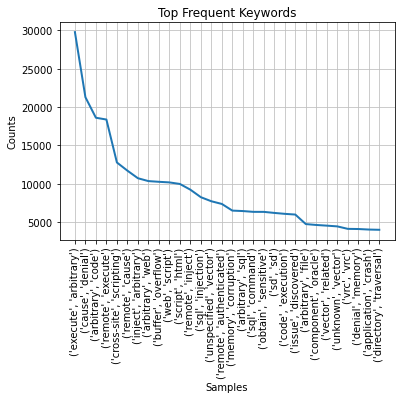

In [22]:
# plot top 30 freq line chart
word_dist_ngram.plot(30, title = 'Top Frequent Keywords' , cumulative=False)

Well, the line chart does not look good. The size of chart is too small. We might need change another type of chart. In this case, bar chart is more appropriate to compare variables (`keywords`). Also, the x-label is not readable. We might need to do some chart formatting. 

Here, we choose to use one commonly used data visualization library (`matplotlib`)

https://matplotlib.org/tutorials/introductory/pyplot.html

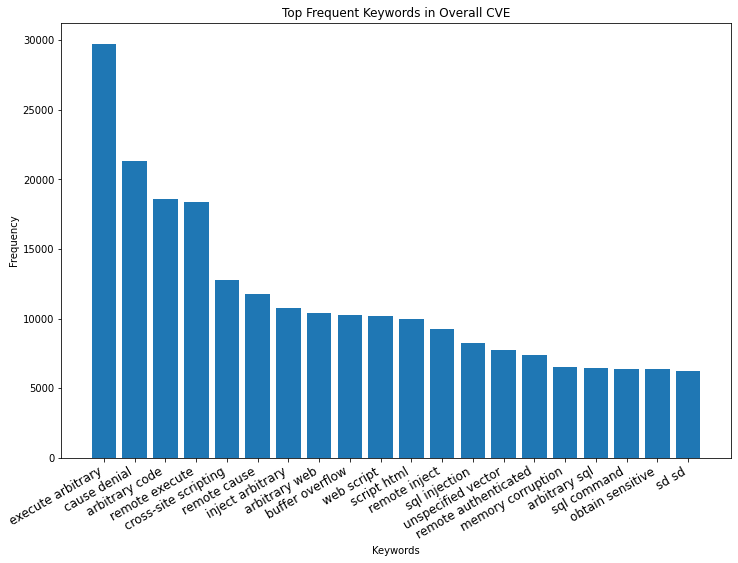

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

# use matplotlib with format
# assign data values
x =  [' '.join(i) for i in top_rslt.Word] 
y = top_rslt.Frequency

plt.figure(figsize=(12,8))
plt.bar(x, y)
plt.xticks(rotation=30, horizontalalignment='right', fontsize=12)
plt.title('Top Frequent Keywords in Overall CVE')
plt.xlabel('Keywords')
plt.ylabel('Frequency')
plt.show()

There are many other data visualization & chart plot library in Python. You can try them when you have time after this workshop.

Reference:
https://mode.com/blog/python-data-visualization-libraries/

### Word Cloud

Many times, we might have seen a cloud filled with lots of words in different sizes, which represent the frequency or the importance of each word. This is called `Tag Cloud` or `Word Cloud`.

In Python, it is very easy to implement with `wordcloud` library.

Reference: https://amueller.github.io/word_cloud/auto_examples/index.html

First, let's generate a word cloud using `corpus`

In [25]:
corpus[:100]

'ip_input bsd-derived tcp/ip implementation remote cause denial crash hang packet mime buffer overflo'

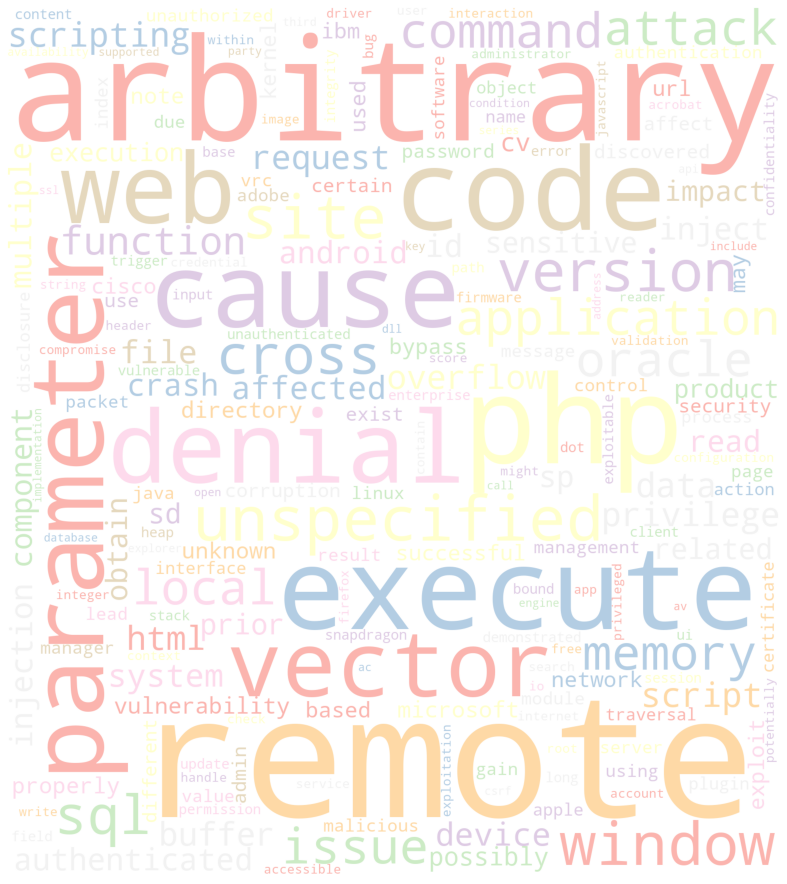

In [24]:
from wordcloud import WordCloud, STOPWORDS

WC_height = 1800
WC_width = 1600
WC_max_words = 200

wordcloud = WordCloud(max_words = WC_max_words, width = WC_width, height = WC_height, 
                  random_state=42, background_color='white', colormap='Pastel1', 
                  collocations=False, stopwords = STOPWORDS).generate(corpus)

plt.figure(figsize=(20, 16))
plt.imshow(wordcloud) 
plt.axis("off");

Next, let's apply our n-gram forms of tokens to word cloud. 

Let's preview n-gram frequency distribution table that we previously generated.

In [26]:
# preview
dict(list(word_dist_ngram.items())[0:10])

{('bsd-derived', 'tcp/ip'): 1,
 ('cause', 'denial'): 21275,
 ('crash', 'hang'): 58,
 ('denial', 'crash'): 2188,
 ('hang', 'packet'): 17,
 ('implementation', 'remote'): 22,
 ('ip_input', 'bsd-derived'): 1,
 ('packet', 'mime'): 1,
 ('remote', 'cause'): 11729,
 ('tcp/ip', 'implementation'): 10}

WordCloud provides a `.generate_from_frequencies()` method, but it requires a specific data structure as its input. Let's do some data conversion.

In [28]:
# do some data structure convert
corpus_ngram = {' '.join(k): v for k, v in word_dist_ngram.items()}

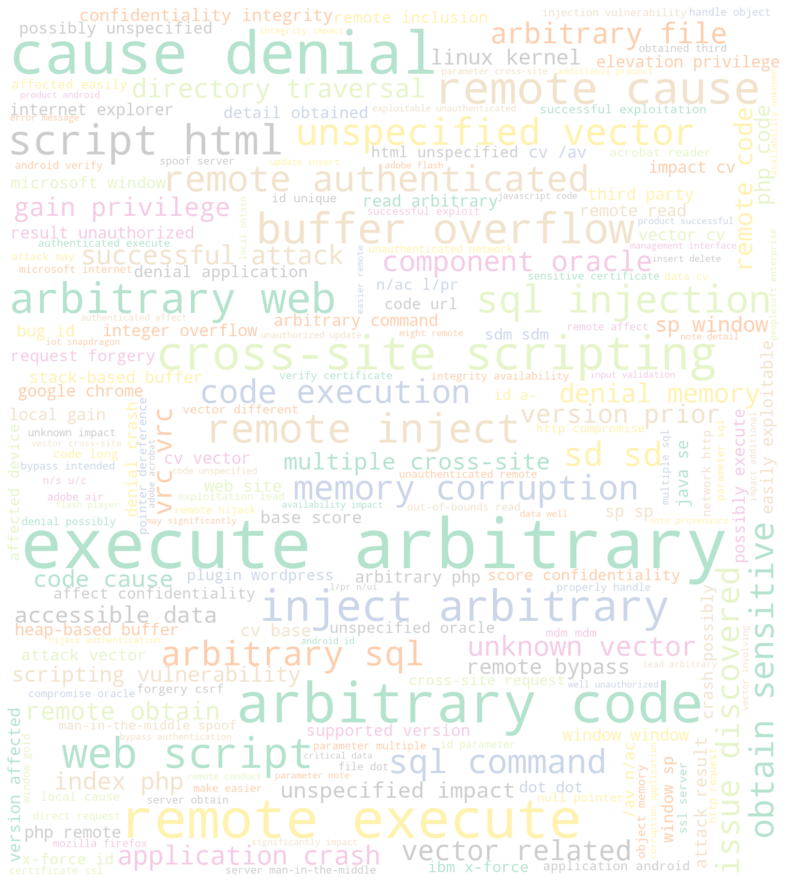

In [29]:
# ready to work on new corpus
# change colormap

WC_height = 1800
WC_width = 1600
WC_max_words = 200

wordCloud_ngram = WordCloud(max_words = WC_max_words, height = WC_height, width = WC_width, 
                            stopwords=STOPWORDS, random_state=42,  
                            background_color='white', colormap='Pastel2')

wordCloud_ngram.generate_from_frequencies(corpus_ngram)

plt.figure(figsize=(20, 16))

plt.imshow(wordCloud_ngram, interpolation='bilinear')
plt.axis("off")
plt.show()

The word cloud above shows more information  than the one with unigram. You can further improve the word cloud such as further clean up `stop-words`, or using NLP techniques to remove words based on `POS Tagging`. For example, remove `adj., adv.`. just keep `verb` and `Noun`.

There are some reference available that you might try after the workshop
https://www.geeksforgeeks.org/part-speech-tagging-stop-words-using-nltk-python/
http://www.nltk.org/book_1ed/ch05.html

Next, let's do some fancy technique for our n-gram word cloud. We can use a custom mask to embed our word cloud into an image.

In [30]:
# download some logo jpg file

fetch_data(download_url = 'https://github.com/tisage/workshop-gencyber/raw/main/pic/logo_remix.jpg',
           save_path=os.path.join("pic"), save_name = "logo_remix.jpg")

fetch_data(download_url = 'https://github.com/tisage/workshop-gencyber/raw/main/pic/Shield_Logo.jpg',
           save_path=os.path.join("pic"), save_name = "Shield_Logo.jpg")

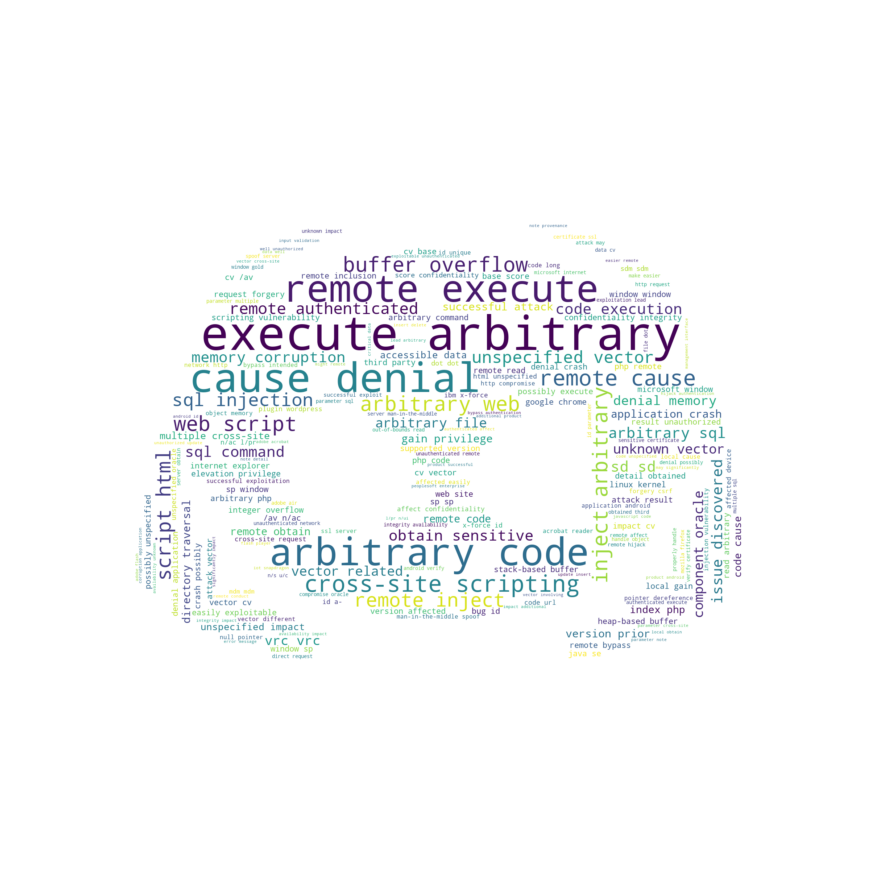

In [31]:
# image embedded
custom_mask = np.array(Image.open("pic/logo_remix.jpg"))
wc = WordCloud(background_color="white", mask=custom_mask)
wc.generate_from_frequencies(corpus_ngram)

plt.figure(figsize=(20, 16))

plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

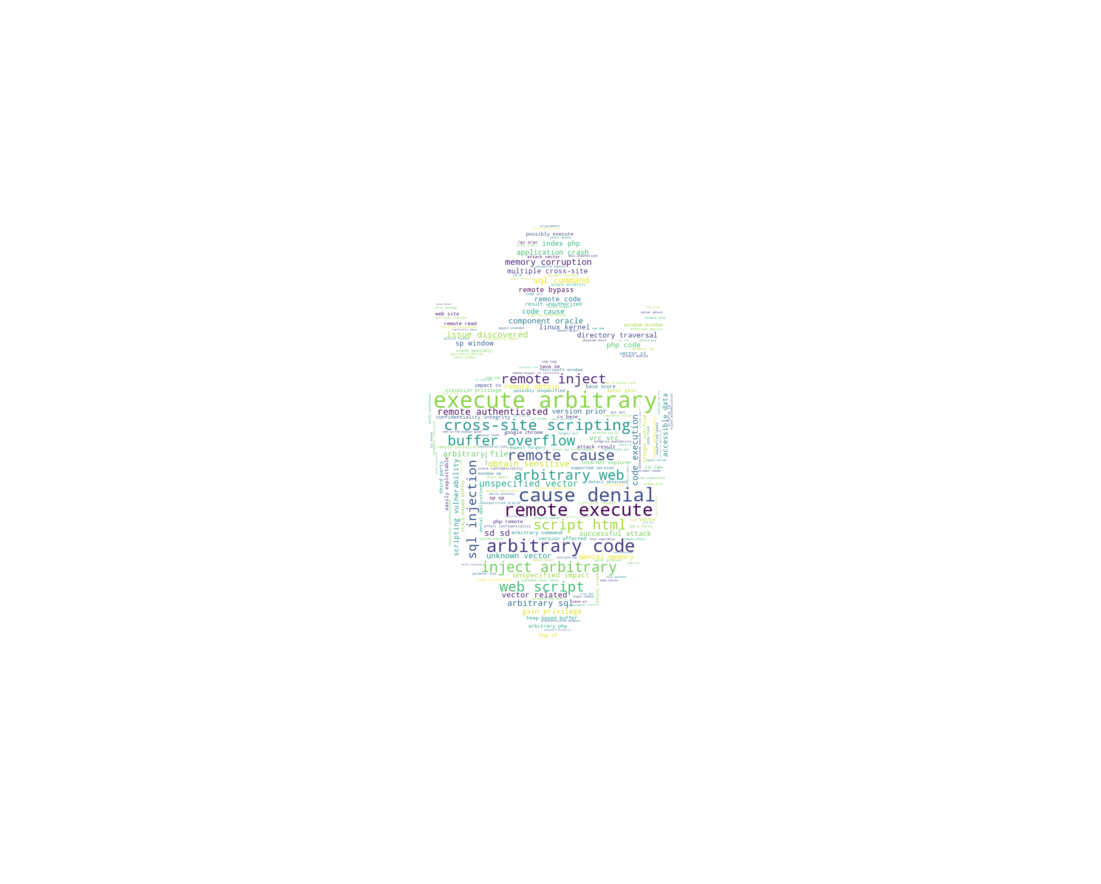

In [32]:
# image embedded
custom_mask = np.array(Image.open("pic/Shield_Logo.jpg"))
wc = WordCloud(background_color="white", mask=custom_mask)
wc.generate_from_frequencies(corpus_ngram)

plt.figure(figsize=(20, 16))

plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

Feel free to change the embedded image and adjust those parameters. Have fun!

### Quiz
Suppose we have two series of numbers stored in `series_1`, `series_2`.



In [33]:
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

series_1 = np.random.randn(300)                     # random(y)
series_2 = pd.date_range('1/1/2020', periods=300) #time(x)

How to use `matplotlib` to draw a basic line graph for these two variables?

Enter your code:

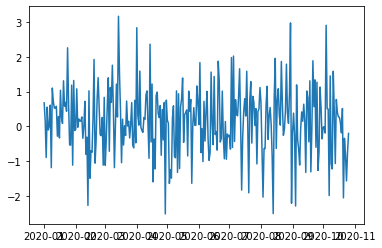

In [34]:
plt.plot(series_2, series_1)

Suppose we have a report as follows.

In [35]:
report = 'More than 22,000 vulnerabilities were disclosed in 2019 and over one-third had an exploit or ' \
  'a proof-of-concept (PoC) available, Risk Based Security revealed on Tuesday. '\
  'The company’s 2019 Year End Vulnerability QuickView Report shows that of the 22,316 new security holes 33% were rated high severity based on their CVSS score. '\
  'The total number of vulnerabilities was slightly smaller compared to 2018 (23,210 vulnerabilities) and roughly the same as in 2017. '\
  'It’s worth noting that thousands of vulnerabilities disclosed last year have not been assigned CVE identifiers. '\
  'The vendors with the most disclosed vulnerabilities include Oracle, IBM, Google, Microsoft, Dell and Cisco. '\
  'Some Linux distributions and open source software are also in the top 10.' \
  'A majority of vulnerabilities are disclosed on Patch Tuesday, when major vendors such as Adobe, Microsoft, Siemens and SAP release security updates for their products. '\
  'The Patch Tuesday updates for August 2019 patched 327 flaws — more than on any other day — with 62% of them coming from Microsoft and Adobe. '\

 How can we show the top 10 most common words using `nltk.FreqDist`?

 Enter your code

In [36]:
nltk.FreqDist(nltk.tokenize.word_tokenize(report)).most_common(10)

[(',', 8),
 ('.', 7),
 ('vulnerabilities', 6),
 ('and', 6),
 ('of', 5),
 ('disclosed', 4),
 ('on', 4),
 ('The', 4),
 ('the', 4),
 ('in', 3)]

(Optional)
Try to replace the embedded picture of word cloud with your favourite one.
You can put the pictures in the directory `pic/ ` of your jupter notebook path. Make adjustments of parameters in `width, height, max_words`, etc.


In [37]:
word_dist_ngram = nltk.FreqDist(everygrams(token, ngram_min, ngram_max))
word_dist_ngram

FreqDist({('ip_input', 'bsd-derived'): 1,
          ('bsd-derived', 'tcp/ip'): 1,
          ('tcp/ip', 'implementation'): 10,
          ('implementation', 'remote'): 22,
          ('remote', 'cause'): 11729,
          ('cause', 'denial'): 21275,
          ('denial', 'crash'): 2188,
          ('crash', 'hang'): 58,
          ('hang', 'packet'): 17,
          ('packet', 'mime'): 1,
          ('mime', 'buffer'): 1,
          ('buffer', 'overflow'): 10279,
          ('overflow', 'email'): 1,
          ('email', 'client'): 9,
          ('client', 'solaris'): 4,
          ('solaris', 'mailtool'): 1,
          ('mailtool', 'outlook'): 1,
          ('outlook', 'teardrop'): 1,
          ('teardrop', 'ip'): 4,
          ('ip', 'denial'): 2,
          ('denial', 'root'): 2,
          ('root', 'privilege'): 840,
          ('privilege', 'buffer'): 61,
          ('overflow', 'xlock'): 2,
          ('xlock', 'command'): 1,
          ('command', 'sgi'): 2,
          ('sgi', 'irix'): 42,
          ('ir

---

## Lab 2: Data Aggregation

We will use a very useful `.groupby()` in `pandas`. A `groupby` operation involves some combination of splitting the object, applying a function, and combining the results. This can be used to group large amounts of data and compute operations on these groups.

Reference:
https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html

In [38]:
import datetime
import pandas as pd

# generate data and format with datetime as index
date_list = [datetime.datetime.today() - datetime.timedelta(days=x) for x in range(0, 365)]
score_list = list(np.random.randint(low=1, high=1000, size=365))
df_test = pd.DataFrame(list(zip(date_list, score_list)), columns=['date','price'])
df_test['date'] = pd.to_datetime(df_test['date'])
df_test.index = df_test['date'] 
df_test.drop(['date'], inplace=True, axis=1)

df_test.head()

,price
date,
2020-10-16 19:42:30.785089,286
2020-10-15 19:42:30.785110,413
2020-10-14 19:42:30.785113,880
2020-10-13 19:42:30.785115,138
2020-10-12 19:42:30.785117,303


How we aggregate the `price` and calculate the **average** price for each **month**? Let's use `groupby` with `pd.Grouper()` method.

 https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Grouper.html

In [39]:
df_test.groupby(pd.Grouper(freq = 'M')).mean()

,price
date,
2019-10-31,432.000000
2019-11-30,480.900000
2019-12-31,464.161290
2020-01-31,522.290323
2020-02-29,442.551724
2020-03-31,499.000000
2020-04-30,493.733333
2020-05-31,418.580645
2020-06-30,529.033333


Good, next let's aggregate our CVE data.

In Lab 1, our data spans few years. Because CVEs are recorded since 1999 and many of vulnerabilities in the past are not applied for current hardware/software. Thus, it is necessary to analyze our data on an annual basis.

The good news is that our dataset has `PhaseDate` column. It can be used as a filter to split our data into sub-group. For example, each group contains all the phase data recorded in that year.

First of all, let's sort our data by its datetime using `.sort_values()`.

We might need to convert `PhaseDate` column into a `datetime format` if we have not set the data type when we parse it. (`df = pd.read_csv(..., parse_dates=['PhaseDate']`)

Note: In `pandas`, it uses the `NumPy` `datetime64` and `timedelta64` dtypes. There are some difference between NumPy datetime vs Python datetime, but we can convert them back and forth very easily. You can find many useful methods and reference such as https://www.analyticsvidhya.com/blog/2020/05/datetime-variables-python-pandas/

In [40]:
# Double check data type in PhaseDate column
df['PhaseDate'] = pd.to_datetime(df['PhaseDate'])

df.dtypes

Name                   object
PhaseDate      datetime64[ns]
PhaseStatus            object
Desp                   object
dtype: object

In [41]:
# Sorting df by PhaseDate
df.sort_values(by='PhaseDate', inplace=True)
df.head()

,Name,PhaseDate,PhaseStatus,Desp
19,CVE-1999-0121,1999-06-17,Proposed,buffer overflow dtaction command give root
9,CVE-1999-0088,1999-06-17,Proposed,irix aix automountd service autofsd remote execute root command
1,CVE-1999-0004,1999-06-21,Modified,mime buffer overflow email client solaris mailtool outlook
7,CVE-1999-0078,1999-06-21,Modified,pcnfsd rpc pcnfsd local change permission execute arbitrary command argument rpc call
11,CVE-1999-0092,1999-06-23,Proposed,various vulnerability aix portmir command local obtain root


`df` is sorted by date time. Next, let's use `.groupby()` to aggregate our data by Year.

Reference
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html

In [42]:
# Aggregation based on `Desp` column and group them by Year
# Can modify group type, by year "Y", or by month "M" or by day "D"

per = df['PhaseDate'].dt.to_period("Y")
group = df.groupby(per)['Desp'].apply(' '.join).reset_index()
group.dtypes

PhaseDate    period[A-DEC]
Desp                object
dtype: object

In [43]:
# convert data type
group['PhaseDate'] = group['PhaseDate'].astype(str).astype(int)
group.dtypes

PhaseDate     int64
Desp         object
dtype: object

In [44]:
group

,PhaseDate,Desp
0,1999,buffer overflow dtaction command give root irix aix automountd service autofsd remote execute root command mime buffer overflow email cl...
1,2000,denial linux running ldd command core race condition linux mailx command local read file race condition linux local read arbitrary memor...
2,2001,installation tumbleweed messaging management system mm formerly worldtalk worldsecure creates default account sa password buffer overflo...
3,2002,digital signature mechanism adobe acrobat pdf viewer verifies pe header executable code plug-in execute arbitrary code certified mode ma...
4,2003,unknown dns intrusion detection application filter microsoft internet security acceleration isa remote cause denial blocked traffic dns ...
5,2004,stack-based buffer overflow vfs_s_resolve_symlink vfs/direntry midnight commander mc possibly later version remote execute arbitrary cod...
6,2005,unknown dlsw dissector ethereal remote cause denial application crash assertion race condition page fault handler fault linux kernel run...
7,2006,double free authentication authentication token alteration code pam-mysql pre remote cause denial application crash possibly execute arb...
8,2007,buffer overflow apple quicktime remote execute arbitrary code long rtsp // uri multiple unspecified vulnerability osp-cert ibm os/ vrm u...
9,2008,multiple buffer overflow htmsr dll html speed reader autonomy formerly verity keyview used ibm lotus note remote execute arbitrary code ...


The `group` data frame now has 21 rows. Each row contains all the CVE descriptions in that year and the aggregated of description are grouped (appended) in a long text string. This is one of the most simple way to analyze CVE on an annual basis. You might change the aggregation interval to Monthly, Weekly, or any other time interval for different use cases.

### Annual Frequency Analysis
Combining what we just learned in `Lab 1`, let's do some frequency analysis on annual grouped data.
We might need some data structure to store the processed results (tokens, freqDist, freq Table).

Note: you can choose your favorite data structure in Python. Here, let's use `list` for demonstration.

In [45]:
# build up Frequency Distribution Table for each year
# ngram support

ngram_min = 2
ngram_max = 2

word_dists_annual = []
n = group.shape[0]
columnName = 'Desp'

# use a loop and list to store processed data
for i in range(n):
    tokens = group[columnName][i].lower()
    words = nltk.tokenize.word_tokenize(tokens)
    word_dists_annual.append(nltk.FreqDist(everygrams(words, ngram_min, ngram_max)))

In [49]:
# a list to hold year
years = []

for i in range(n):
    years.append(group['PhaseDate'][i])

In [50]:
# Print Top Words on group on specific year

def topFreqTable(top_N, year):

    index = years.index(year)
    rslt = word_dists_annual[index].most_common(top_N)
    result = pd.DataFrame(rslt, columns=['Word', 'Frequency'])
    result['Word'] = [' '.join(i) for i in result.Word] 
    return result

In [51]:
topFreqTable(10, 2007)

,Word,Frequency
0,execute arbitrary,2978
1,remote execute,2245
2,cause denial,1276
3,arbitrary code,1249
4,buffer overflow,1007
5,inject arbitrary,961
6,cross-site scripting,956
7,remote inject,902
8,web script,901
9,arbitrary web,884


In [68]:
topFreqTable(20, 2019)

,Word,Frequency
0,code execution,1765
1,issue discovered,1454
2,sdm sdm,1409
3,arbitrary code,1318
4,execute arbitrary,1121
5,version prior,962
6,elevation privilege,938
7,remote code,893
8,affected device,783
9,plugin wordpress,769


Similarly, plot top frequent words and apply some style template.

There are many stylesheets defined in `Matplotlib`.

https://matplotlib.org/3.2.1/gallery/style_sheets/style_sheets_reference.html

In [52]:
import matplotlib.pyplot as plt
%matplotlib inline

def topFreqPlot(top_N, year):

    table = topFreqTable(top_N, year)

    x = table.Word
    y = table.Frequency
    
    # use fivethirtyeight style
    plt.style.use('fivethirtyeight')

    plt.figure(figsize=(12,8))
    plt.bar(x, y)
    plt.xticks(rotation=30, horizontalalignment='right', fontsize=12)
    
    plt.title('Top %s Frequent Keywords in %s' % (top_N, year))
    plt.xlabel('CVE Keywords')
    plt.ylabel('Frequency')
    plt.show()


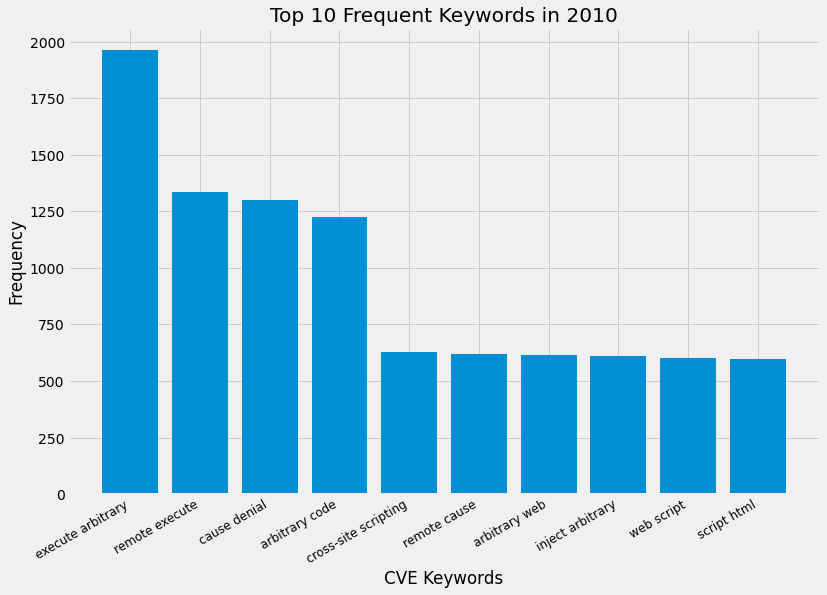

In [53]:
topFreqPlot(10, 2010)

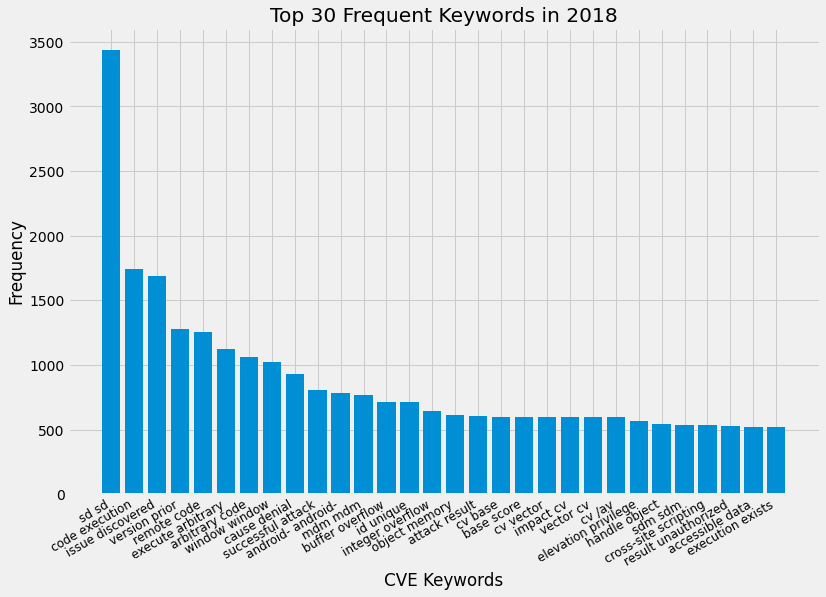

In [71]:
topFreqPlot(30, 2018)

Feel free to customize your own style in your plot. 😉

### Search Keyword Term-Frequency across Year

What we analyzed so far is only the frequencies in a single year. What if we plan to see the trend of keywords?

Thus, we can use some basic time series analysis on numerical data with time. Time series analysis comprises methods for analyzing time series data in order to extract meaningful statistics and other characteristics of the data.

In addition, we plan to search keywords with unigram and bigram support. Let's rebuild our FreqTable with a range of N in N-gram.

In [54]:
ngram_min = 1
ngram_max = 2

word_dists_ngram = []
n = group.shape[0]
columnName = 'Desp'

# use a loop and list to store processed data
for i in range(n):
    tokens = group[columnName][i].lower()
    words = nltk.tokenize.word_tokenize(tokens)
    word_dists_ngram.append(nltk.FreqDist(everygrams(words, ngram_min, ngram_max)))

In [55]:
# Search a Keyword fromn a NLTK Frequency Distribution Table from specific year
# return key and its value
# unigram case support
# bigram case support

def searchAnnualFreq(keyword, year):
    index = years.index(year)
    len_keyword = len(keyword.split())
    
    if len_keyword == 1:
        keyword1 = keyword.split()[0]
        return [keyword, word_dists_ngram[index][(keyword1,)]]

    if len_keyword == 2:
        keyword1 = keyword.split()[0]
        keyword2 = keyword.split()[1]
        return [keyword, word_dists_ngram[index][(keyword1,keyword2)]]

In [56]:
searchAnnualFreq('remote', 2012)

['remote', 4709]

In [57]:
searchAnnualFreq('sql injection', 2007)

['sql injection', 750]

In [58]:
# Overall Keyword Frequency

def printKeywordFreq(overall_keywords):
    overall_results = []
    for i in range(n):
        overall_results.append(searchAnnualFreq(overall_keywords, years[i])[1])

    return pd.DataFrame(list(zip(years, overall_results)),
                        columns=['Year', str(overall_keywords)])

In [59]:
printKeywordFreq('remote')

,Year,remote
0,1999,51
1,2000,209
2,2001,403
3,2002,588
4,2003,627
5,2004,808
6,2005,5607
7,2006,6655
8,2007,7050
9,2008,4964


In [60]:
printKeywordFreq('sql injection')

,Year,sql injection
0,1999,0
1,2000,0
2,2001,0
3,2002,14
4,2003,26
5,2004,24
6,2005,699
7,2006,1015
8,2007,750
9,2008,1096


### Plot Keyword across Year

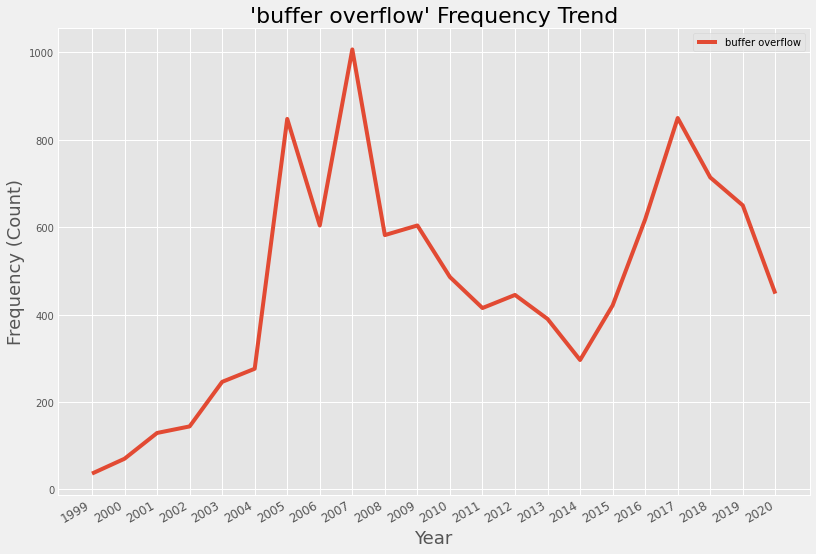

In [61]:
keyword_plot = 'buffer overflow'

table = printKeywordFreq(keyword_plot)
x = table.Year
y = table.iloc[:,[1]]

plt.figure(figsize=(12,8))
plt.style.use('ggplot')

plt.plot(x, y)
plt.xticks(x, rotation=30, horizontalalignment='right', fontsize=12)

plt.title('\'%s\' Frequency Trend' % keyword_plot, fontsize=22)
plt.xlabel('Year', fontsize=18)
plt.ylabel('Frequency (Count)', fontsize=18)
plt.legend([keyword_plot])
plt.show()

### Quiz
Suppose a person recorded his/her daily income since last year in a dataframe `df_wage`. It has a column `income` and related `date` as index. 

In [62]:
import datetime
import pandas as pd

# generate data and format with datetime as index
date_list = [datetime.datetime.today() - datetime.timedelta(days=x) for x in range(0, 365)]
score_list = list(np.random.randint(low=100, high=200, size=365))
df_wage = pd.DataFrame(list(zip(date_list, score_list)), columns=['date','income'])
df_wage['date'] = pd.to_datetime(df_wage['date'])
df_wage.index = df_wage['date'] 
df_wage.drop(['date'], inplace=True, axis=1)

df_wage.head()

,income
date,
2020-10-16 19:44:41.506023,187
2020-10-15 19:44:41.506042,120
2020-10-14 19:44:41.506045,164
2020-10-13 19:44:41.506047,148
2020-10-12 19:44:41.506049,197


If the person wants to know his or her montly income, what we can do?

hint:  `.groupby()`, and  `.sum()` 

Enter your code:

In [63]:
df_wage.groupby(pd.Grouper(freq='M')).sum()

,income
date,
2019-10-31,2022
2019-11-30,4705
2019-12-31,4604
2020-01-31,4904
2020-02-29,4057
2020-03-31,4546
2020-04-30,4573
2020-05-31,4750
2020-06-30,4654


How to draw a simple chart for results above?

Enter your code:

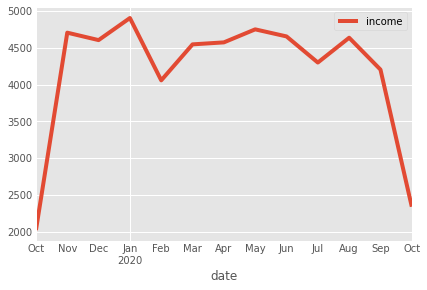

In [64]:
df_wage.groupby(pd.Grouper(freq='M')).sum().plot()

---

## Lab 3: Some Advanced Tricks

### Export Frequency Table

In [65]:
# create a directory `output`
import os
output_path = 'output'
if not os.path.isdir(output_path):
    os.makedirs(output_path)

In [66]:
# save group into csv
# group.to_csv('group.csv', encoding='utf-8', index=False)

In [67]:
# save keywords frequency table into csv
# for example, save keywords = 'remote' as a 'remote_df.csv' on hard drive

keywords_name = 'buffer overflow'
keyword_df = printKeywordFreq(keywords_name)

keyword_df.to_csv(output_path+'/'+keywords_name+'.csv', encoding='utf-8', index=False)

In [101]:
keyword_df

,Year,buffer overflow
0,1999,36
1,2000,70
2,2001,129
3,2002,144
4,2003,246
5,2004,276
6,2005,848
7,2006,604
8,2007,1007
9,2008,582


In [68]:
# plot multiple keywords in a list.
# you can add many as you want
keywords_list = ['buffer overflow', 'red hat', 'sql', 'linux', 'sql injection']

# loop to merge columns, 0 will be filled in if there is no such keywords in that year
for i in range(len(keywords_list)):
    if i == 0:
        df_all = printKeywordFreq(keywords_list[0])
    else:
        df_all = df_all.merge(printKeywordFreq(keywords_list[i]))

In [103]:
# show the multiple keywords results
df_all

,Year,buffer overflow,red hat,sql,linux,sql injection
0,1999,36,2,0,12,0
1,2000,70,10,25,27,0
2,2001,129,7,7,34,0
3,2002,144,6,30,29,14
4,2003,246,4,47,46,26
5,2004,276,4,44,77,24
6,2005,848,17,1434,231,699
7,2006,604,9,2030,186,1015
8,2007,1007,26,1528,176,750
9,2008,582,54,2231,150,1096


In [69]:
# df_all['Year'] = pd.to_datetime(df_all['Year'], format='%Y')

df_all.index = df_all['Year']

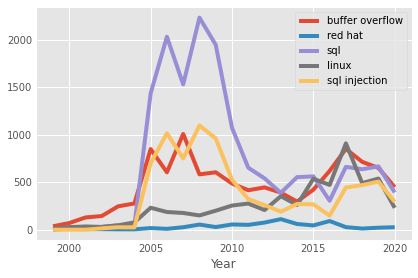

In [70]:
# a simple plot
df_all.loc[:, df_all.columns != 'Year'].plot()

In [71]:
# save this multiple keywords results in hard disk, name it as 'df_all.csv'
df_all.to_csv(output_path+'/df_all.csv', encoding='utf-8')

### Interactive Plot
There are many third-party libraries that enable interactive plotting  in Python.

Some Python libraries to create interactive plots:

- mpld3
- pygal
- Bokeh
- HoloViews
- Plotly

They all have their own use cases. `mpld3` brings together Python's core plotting library `matplotlib` and the popular `JavaScript` charting library `D3` to create browser-friendly visualizations. `pygal` is a great choice for producing beautiful out-of-the-box charts with very few lines of code. `Bokeh` plots can be output as `JSON` objects, `HTML` documents, or interactive web applications. `HoloViews` offers sliders so folks can play with a variable to see its effect. `Plotly` is a web-based service by default, but you can use the library offline in Python and upload plots to Plotly's free, public server or paid, private server.


In this workshop, since our environment is Jupyter (or Colab) notebook, let's just use `ploty` to plot some interactive plots in our  Notebook.

In [72]:
df_all.head()

,Year,buffer overflow,red hat,sql,linux,sql injection
Year,,,,,,
1999,1999,36,2,0,12,0
2000,2000,70,10,25,27,0
2001,2001,129,7,7,34,0
2002,2002,144,6,30,29,14
2003,2003,246,4,47,46,26


In [73]:
# require plotly v4.8+# require plotly v4.8+# require plotly v4.8+
import plotly.express as px

fig = px.line(df_all, x="Year", y=list(df_all.iloc[:,1:].columns))

fig.update_layout(title='CVE Keywords Trend',
                   xaxis_title='Year',
                   yaxis_title='Frequency')

fig.show()

Using the interactive chart above, we can do zooming, hovering a marker to get a tooltip, choosing a variable to display on the right side legend. That's more user friendly and get edge in our presentation.

Let's play with some interactive functions using `.widgets` in Juypter Notebook. This is a little out of scope of this workshop but you can learn through reading the codes and practice with modification.


In [75]:
# a plot function contains data processing and create an interactive plotly object
# with plot format support
# with line style
import plotly.graph_objects as go


def cvePlotMain(input_string):
    
    # data process
    keywords_list = [x.strip() for x in input_string.split(',')]

    for i in range(len(keywords_list)):
        if i == 0:
            df_all = printKeywordFreq(keywords_list[0])
        else:
            df_all = df_all.merge(printKeywordFreq(keywords_list[i]))

    year = df_all.iloc[:,0]


    # plot
    fig = go.Figure()

    # line dash style
    dash_style = ['solid', 'dot', 'dash', 'longdash', 'dashdot', 'longdashdot']
    
    
    # data frame for each line
    for column in df_all.iloc[:,1:]:
        columnObj = df_all[column]

        fig.add_trace(go.Scatter(x=year, y=columnObj.values,
                            mode='lines+markers',
                            name=column,
                            line = dict(dash = str(random.choice(dash_style)))))
    
    # plot format with annotations
    annotations = []

    # title
    annotations.append(dict(xref='paper', yref='paper', x=0.0, y=1.05,
                                  xanchor='left', yanchor='bottom',
                                  text='CVE Keywords Trend across Year',
                                  font=dict(family='Arial',
                                            size=30,
                                            color='rgb(37,37,37)'),
                                  showarrow=False))

    # source
    annotations.append(dict(xref='paper', yref='paper', x=0.5, y=-0.15,
                                  xanchor='center', yanchor='top',
                                  text='Source: MITRE\'s CVE https://cve.mitre.org',
                                  font=dict(family='Arial',
                                            size=12,
                                            color='rgb(150,150,150)'),
                                  showarrow=False))

    
    fig.update_layout(annotations=annotations, xaxis_title='Year', yaxis_title='Frequency')

    fig.show()

In [76]:
from ipywidgets import widgets

import random
random.seed(42)

# a function to ask user's input as searching argument
# use jupyter widegets to display in notebook
# no input validation, so just use basic UI to restrict input
def cvePlot():
    # some basic UI
    print("Please Type Keywords in the Input Box Below with `Enter`")
    print("(Keywords can be up to two words and multiple keywords should be separated by a comma `,`)")

    # Create text widget for output
    output_text = widgets.Text()

    # Create text widget for input
    input_text = widgets.Text()

    # Define function to bind value of the input to the output variable 
    def bind_input_to_output(sender):
        output_text.value = input_text.value.lower()
        cvePlotMain(output_text.value)

    # Tell the text input widget to call bind_input_to_output() on submit
    input_text.on_submit(bind_input_to_output)


    # Display input text box widget for input
    return input_text

OK. Let's try to enter some common vulnerabilities keywords after we run the `cvePlot()` function. For example, 

`sql injection, cross-site scripting, buffer overflow, arbitrary code, Authentication`

In [79]:
cvePlot()

Please Type Keywords in the Input Box Below with `Enter`
(Keywords can be up to two words and multiple keywords should be separated by a comma `,`)


Text(value='')

# New Section

After run the `cvePlot()` above and enter some cve keywords with enter, we will see our customized interactive plot.

Cool! We may customize plot functions, aplly other styles & libraries, add button, or even export as web app.

Reference: https://mode.com/blog/python-interactive-plot-libraries/

We might also try to use other data source with similary text processing piplines and make our own data visualization toolkit.

---

In summary, during this workshop, we have learned frequency analysis on text data and how to apply text visualization techniques on our data. We can apply those techniques to other similar use cases. 

Feed your curiosity and see what you discover! Hope you enjoy this series workshop! 😉 
